In [227]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit
import healpy as hp

## Use redshift from lecture 'spectroscopy'

In [50]:
dist = pd.read_csv('dist.txt', sep=" ")
dist.head(5)

,spec,dist
0,0,57.623549
1,1,14.144904
2,2,59.951493
3,3,64.061927
4,4,28.933435


Match redshift from spec{num}.txt with distance and calculate hubble constant!

## Plot cone-diagram with SDSS redshift

In [65]:
z_sdss = pd.read_csv('z_sdss.txt', sep=' ')
z_sdss.head(5)

,ra,dec,z
0,15.988656,31.121303,0.475454
1,15.985467,31.107748,0.285623
2,16.161876,31.118433,-0.000122
3,16.040245,31.105689,0.348952
4,16.055123,31.114574,0.472915


In [214]:
ra_min, ra_max = 120, 240             # cone-diagram을 위한 타겟의 적경 범위, deg 단위로 입력
dec_min, dec_max = 20, 30            # cone-diagram을 위한 타겟의 적위 범위, deg 단위로 입력
ra_phase = -160                     # mollview를 위한 적경의 위상(0일 경우 가장 왼쪽이 -180, 가장 오른쪽이 +180), deg 단위로 입력

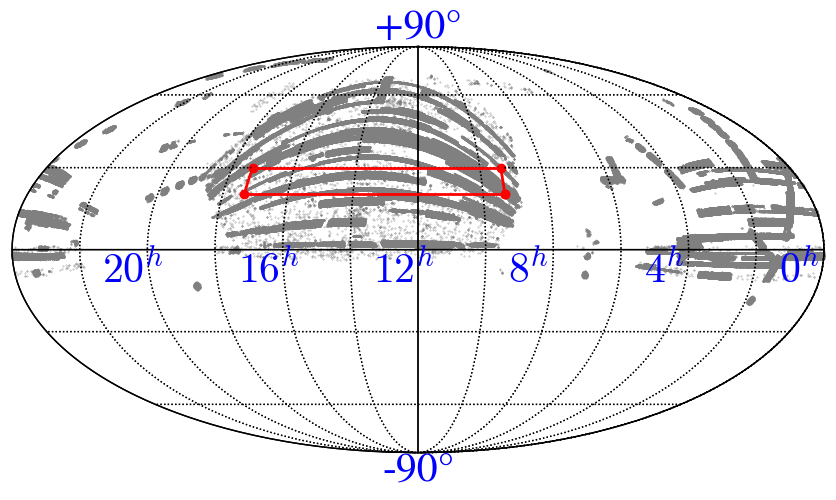

In [215]:
hp.mollview(title="", coord='C', notext=True)
hp.graticule()
theta_sdss = z_sdss['dec']
phi_sdss = z_sdss['ra'] + ra_phase
hp.projscatter(phi_sdss, theta_sdss, lonlat=True, color='gray', marker='o', s=0.1, alpha=0.75)
hp.graticule()

for ra_hour in [0, 4, 8, 12, 16, 20]:
    hp.projtext(15 * ra_hour + ra_phase, 0, f"${ra_hour}^h$", lonlat=True, fontsize=30, color='blue', va='top')

hp.projtext(0, 90, "+90°", lonlat=True, fontsize=30, color='blue', va='bottom', ha='center')
hp.projtext(0, -90, "-90°", lonlat=True, fontsize=30, color='blue', va='top', ha='center')

ra_fix_min, ra_fix_max = (ra_min + ra_phase + 180) % 360 - 180, (ra_max + ra_phase + 180) % 360 - 180
corners_ra = [ra_fix_min, ra_fix_max, ra_fix_max, ra_fix_min, ra_fix_min]
corners_dec = [dec_min, dec_min, dec_max, dec_max, dec_min]
hp.visufunc.projscatter(corners_ra, corners_dec, linestyle='-', color='red', alpha=1, lonlat=True)

num_points = 200
for (ra1, ra2, dec1, dec2) in [(ra_fix_min, ra_fix_max, dec_min, dec_min), \
                               (ra_fix_max, ra_fix_max, dec_min, dec_max), \
                               (ra_fix_max, ra_fix_min, dec_max, dec_max), \
                               (ra_fix_min, ra_fix_min, dec_max, dec_min)]:
    ra_interp = np.linspace(ra1, ra2, num_points)
    dec_interp = np.linspace(dec1, dec2, num_points)
    phi = ra_interp
    theta = dec_interp
    hp.visufunc.projplot(phi, theta, linestyle='-', color='red', alpha=1, lonlat=True)

plt.show()

Select 57805 targets in ra 120~240, dec 20~30


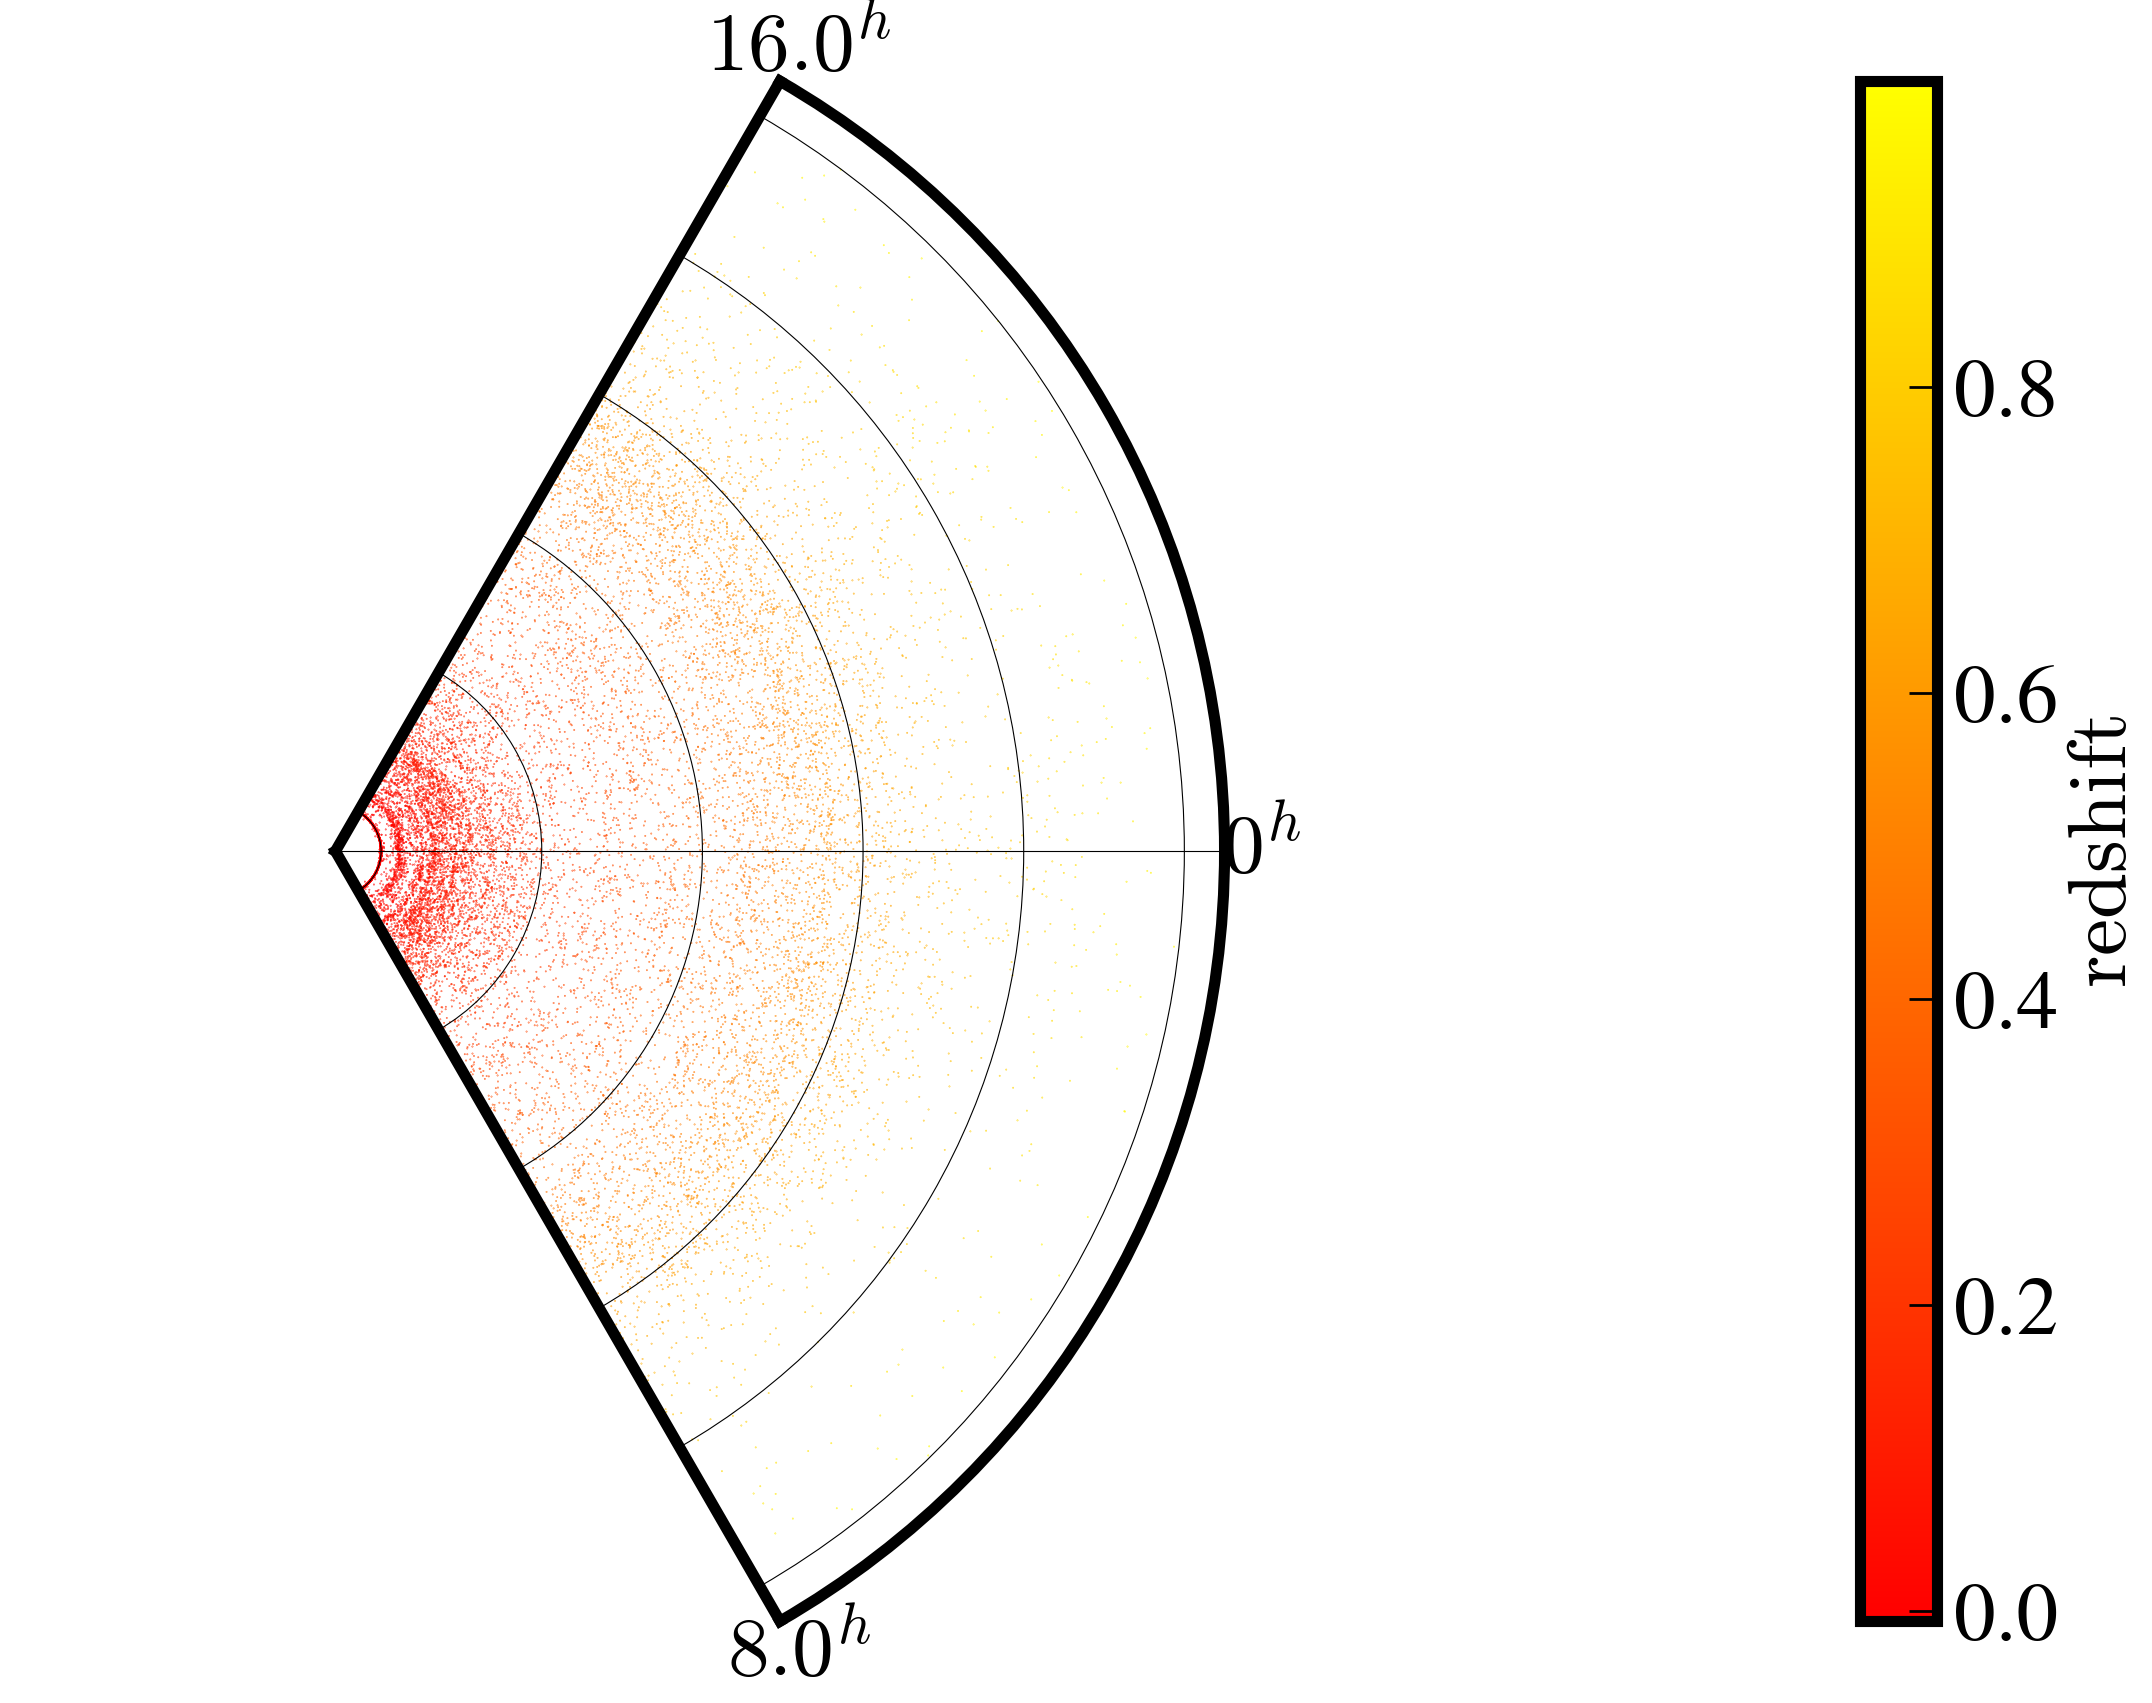

In [244]:
switch_radec = True                 # True -> ra cone diagram, False -> dec cone diagram
cmap = 'autumn'                     # 색상 지정, 구글링해서 하고 싶은 cmap 하시면 됩니다.

index_select = np.where(np.logical_and(\
                        np.logical_and(z_sdss['ra'] > ra_min, z_sdss['ra'] < ra_max),\
                        np.logical_and(z_sdss['dec'] > dec_min, z_sdss['dec'] < dec_max)))[0]

print(f'Select {len(index_select)} targets in ra {ra_min}~{ra_max}, dec {dec_min}~{dec_max}')

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(80, 20))

norm = mcolors.Normalize(vmin=np.min(z_sdss['z'][index_select]), vmax=np.max(z_sdss['z'][index_select]))  
colors = plt.get_cmap(cmap)(norm(z_sdss['z'][index_select])) 

if switch_radec:
    theta_mid = np.mean([ra_min, ra_max])
    scatter = ax.scatter(z_sdss['ra'][index_select], z_sdss['z'][index_select], c=colors, s=0.1)
    ax.set_thetamax(ra_max - theta_mid)
    ax.set_thetamin(ra_min - theta_mid)
    ax.set_yticklabels([])
    ax.set_xticks([np.deg2rad(ra_min - theta_mid), 0, np.deg2rad(ra_max - theta_mid)])  
    ax.set_xticklabels([f'${round(ra_min/15, 1)}^h$', '$0^h$', f'${round(ra_max/15, 1)}^h$'])  
else:
    theta_mid = np.mean([dec_min, dec_max])
    scatter = ax.scatter(z_sdss['dec'][index_select], z_sdss['z'][index_select], c=colors, s=0.1)
    ax.set_thetamax(dec_max - theta_mid)
    ax.set_thetamin(dec_min - theta_mid)
    ax.set_yticklabels([])
    ax.set_xticks([np.deg2rad(dec_min - theta_mid), 0, np.deg2rad(dec_max - theta_mid)])  
    ax.set_xticklabels([f'{dec_min}°', '0°', f'{dec_max}°'])  

cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('$\mathrm{redshift}$')

plt.show()

## Cosmicflows-4

### [Reference]

- Cosmicflows-4 (Tully et al.2023): https://ui.adsabs.harvard.edu/abs/2023ApJ...944...94T/abstract
- The Extragalactic Distance Database (EDD): https://edd.ifa.hawaii.edu/dfirst.php

In [20]:
plt.rcParams["font.family"] = 'STIXGeneral'
plt.rcParams['text.usetex'] = False
plt.rcParams["mathtext.fontset"] = 'cm'
plt.rcParams["axes.labelweight"] = "bold"

plt.rcParams.update({'font.size': 60})
plt.rcParams.update({'font.weight': 'normal'})

plt.rcParams.update({'xtick.direction': 'in'})
plt.rcParams.update({'ytick.direction': 'in'})
plt.rcParams.update({'xtick.major.size': 20})
plt.rcParams.update({'xtick.minor.size': 12})
plt.rcParams.update({'ytick.major.size': 20})
plt.rcParams.update({'ytick.minor.size': 12})
plt.rcParams.update({'xtick.major.width': 2})
plt.rcParams.update({'xtick.minor.width': 2})
plt.rcParams.update({'ytick.major.width': 2})
plt.rcParams.update({'ytick.minor.width': 2})
plt.rcParams.update({'lines.linewidth': 2})
plt.rcParams.update({'axes.linewidth': 8})
plt.rcParams.update({'axes.labelpad': 8})
plt.rcParams.update({'xtick.major.pad': 20})
plt.rcParams.update({'ytick.major.pad': 12})
plt.rcParams.update({'image.origin':'lower'})
plt.rcParams.update({"axes.grid" : True, "grid.color": "black"})

### [Table Information]
We refer to APPENDIX of Tully.R et al.2023
1. cf4_table2.txt: All CF4 individual Distances in EDD
2. cf4_table3.txt: CF4 All Groups in EDD
3. cf4_table4.txt: CF4 All Group Velocities in EDD

### [Column means]
- PGC: The Principal Galaxies Catalog identification of the galaxy in HyperLEDA 
    - HyperLEDA: http://atlas.obs-hp.fr/hyperleda/
    - 상단의 링크는 PGC의 모습을 확인할 수 있는 곳으로, Quick search에 PGC{번호}를 입력하면 해당하는 은하의 정보를 출력합니다.
    - [보충 설명] table2는 PGC, table3과 4는 1PGC (group)을 지칭
- 1PGC: The PGC ID of the dominant galaxy in the group containing the galaxy in question given directly or inferred from the group catalogs of Kourkchi & Tully 2017 or Tully 2015b
    - Kourkchi & Tully 2017: https://ui.adsabs.harvard.edu/abs/2017ApJ...843...16K/abstract
    - Tully 2015b: https://iopscience.iop.org/article/10.1088/0004-6256/149/5/171
    - [보충 설명] 즉, galaxy group의 ID
- T17: The group identification given by Tempel et al. 2017
    - Tempel et al. 2017: https://ui.adsabs.harvard.edu/abs/2017A%26A...602A.100T/abstract
- Vcmb: Systemic velocity of the galaxy in the reference frame of the cosmic microwave background

    - [보충 설명] 관측자 자체의 운동 (예: 지구, MW, GAIA 위성 등의 운동)을 고려한 것이다. 0th order에서는 등방적으로 관측되어야 하는 Cosmic Microwave Background (우주배경복사)가 관측자의 운동에 의한 doppler shift로 dipole 형태로 적색 편이 비등방이 발생하는 것을 역이용하여 보정한다. 때문에 이를 CMB reference velocity라고 부른다.
- DM (eDM): Distance modulus of the galaxy derived from an MCMC analysis incorporating all methodologies and associated uncertainty.

    - [보충 설명]
        - Distance modulus = $m - M = 5\log_{10}\left(\frac{d}{pc}\right) - 5$
        - 쉽게 말해서 Distance ladder를 통해 구한 각 타겟의 distance modulus와 그 error, 타겟의 distance modulus를 추정하는 방식이 여러가지일 경우, 각 값과 그 error를 활용해서 가장 적절한 distance modulus를 추정한 것. MCMC analysis는 Bayesian을 활용한 통계 추정의 한 방법, 자세한 사항은 Tully et al. 2023을 참조

- DMxx (eDMxx): Distance moduli and uncertaities of the following methodologies after registration to a common scale with the MCMC analysis

    [Methologies (참고용)]
    - SN Ia: 표준 촛불 Ia type 초신성의 시간-광도 profile을 활용 (SN Ia의 시간-광도 profile은 정해져 있음)
    - TF: Spiral galaxy의 Tully Fisher relation을 활용 (은하의 회전속도와 광도의 관계)
    - FP: Elliptical galaxy의 Faper Jackson relation을 활용 (은하의 속도분산과 광도의 관계)
    - SBF: Surface Brightness Fluctuation을 활용 (은하의 표면 밝기의 '요동'의 크기가 클 수록 은하가 가깝다.)
    - SN II: core collapse II type 초신성의 팽창 속도 활용 (팽창 속도와 팽창 시간, 초신성의 각지름으로 초신성까지의 거리를 추정)
    - TRGB: Tip of Red Giant Branch을 활용 (별의 진화 단계 중 적색 거성의 '최댓값' 광도를 통해 거리를 추정, 은하의 별이 분해 가능할 때 활용 가능)
    - CPLR: Cepheid Period-Luminosity Relation을 활용 (Cepheid 변광성의 광도와 변광주기 사이의 관계)
    - MASER: NGC 4258의 중심부의 water maser를 활용 (Humphreys et al. 2013; Reid et al. 2019)
- RA, DE, glon, glat, SGX, SGY, SGZ, SGL, SGB: Celestial, galactic, supergalactic coordinates
    - [보충 설명] 
        - 2차원 정보인 (RA, DE), (glon, glat), (SGL, SGB)는 deg이다. 
        - 3차원 정보인 (SGX, SGY, SGZ)의 단위는 table2에서는 Mpc, table4에서는 km/s이다. 
- Nxx (table 3): Number of galaxies in group with a distance contribution by a specific methodology and the weighted average modulus of the specific modulus, with uncertainties
    - Nc, DM_cal: Group에 TRGB, CPLR, MASER에 해당하는 타겟의 개수와 각각의 방식으로 측정한 DM, 이들은 비교적 정확한 정보를 제공하지만 개수가 많지 않아 'calibrator'로 사용
    - SN II는 group에 두 개 이상 존재하는 경우가 없음
- DM (table 4): The same distance modulus and uncertaint of the group averaged over all members of the group with measured distance moduli as in Table 3, Column 2
    - 해당 group의 DM 대푯값
- d (table 4): The luminosity distance corresponding to the modulus in Column 2
    - Mpc 단위
- Vxxx (table 4):  Group velocities in respectively the reference frames of the Sun, the Local Sheet, and the cosmic microwave background.
    - Vcmb 쓰시면 됩니다. 
    - fV는 Vcmb에 우주론적 adjustment parameter를 곱한 것, 학부 수준을 넘는 영역이므로 f값을 따로 계산하실 필요는 없습니다. 
    - pds, pwf, pec은 모두 peculiar velocity로, hubble flow가 아닌 은하의 운동에 의한 후퇴 속도, 더 자세한 사항은 Tully et al. 2023 참조
- Hi (table 4): Group Hubble parameter
    - [보충 설명] cosmicflows-4에서 각 group의 후퇴속도와 거리를 토대로 계산한 Hubble 상수
    - logH는 이 값의 상용 로그

In [3]:
cf4_table2 = pd.read_csv('cf4_table2.txt')
cf4_table3 = pd.read_csv('cf4_table3.txt')
cf4_table4 = pd.read_csv('cf4_table4.txt')

In [15]:
print(cf4_table2.columns)
print(cf4_table3.columns)
print(cf4_table4.columns)

Index(['pgc', '1PGC', 'T17', 'Vcmb', 'DM', 'eDM', 'DMsnIa', 'eDMsn1', 'DMtf',
       'eDMtf', 'DMfp', 'eDMfp', 'DMsbf', 'eDMsbf', 'DMsnII', 'eDMsn2',
       'DMtrgb', 'eDMt', 'DMcep', 'eDMcep', 'DMmas', 'eDMmas', 'RA', 'DE',
       'glon', 'glat', 'sgl', 'sgb', 'SGX', 'SGY', 'SGZ'],
      dtype='object')
Index(['pgc', 'DM_zp', 'DM_av', 'eDM_av', 'Vcmb', 'RA', 'DE', 'GLong', 'GLat',
       'SGL', 'SGB', 'Nc', 'DM_cal', 'Nsn', 'DM_SNIa', 'eDM_SNIa', 'Nfp',
       'DM_FP', 'eDM_FP', 'Ntf', 'DM_TFR', 'eDM_TFR', 'Nsbfo', 'DM_SBFo',
       'eDM_SBFo', 'Nsbfi', 'DM_SBFir', 'eDM_SBFir', 'DM_SNII', 'eDM_SNII'],
      dtype='object')
Index(['pgc', 'DMzp', 'eDM', 'D', 'Vhel', 'Vls', 'Vcmb', 'fV', 'Vpds', 'Vpwf',
       'Vpec', 'Hi', 'logH', 'RA', 'DE', 'glon', 'glat', 'sgl', 'sgb', 'SGX',
       'SGY', 'SGZ'],
      dtype='object')


In [16]:
def linear(x, a):
    return a * x

def dist_mod(mu):
    return 10 ** (mu / 5 + 1)

Text(0, 0.5, '$\\mathrm{v_{CMB}\\ [km\\cdot s^{-1}]}$')

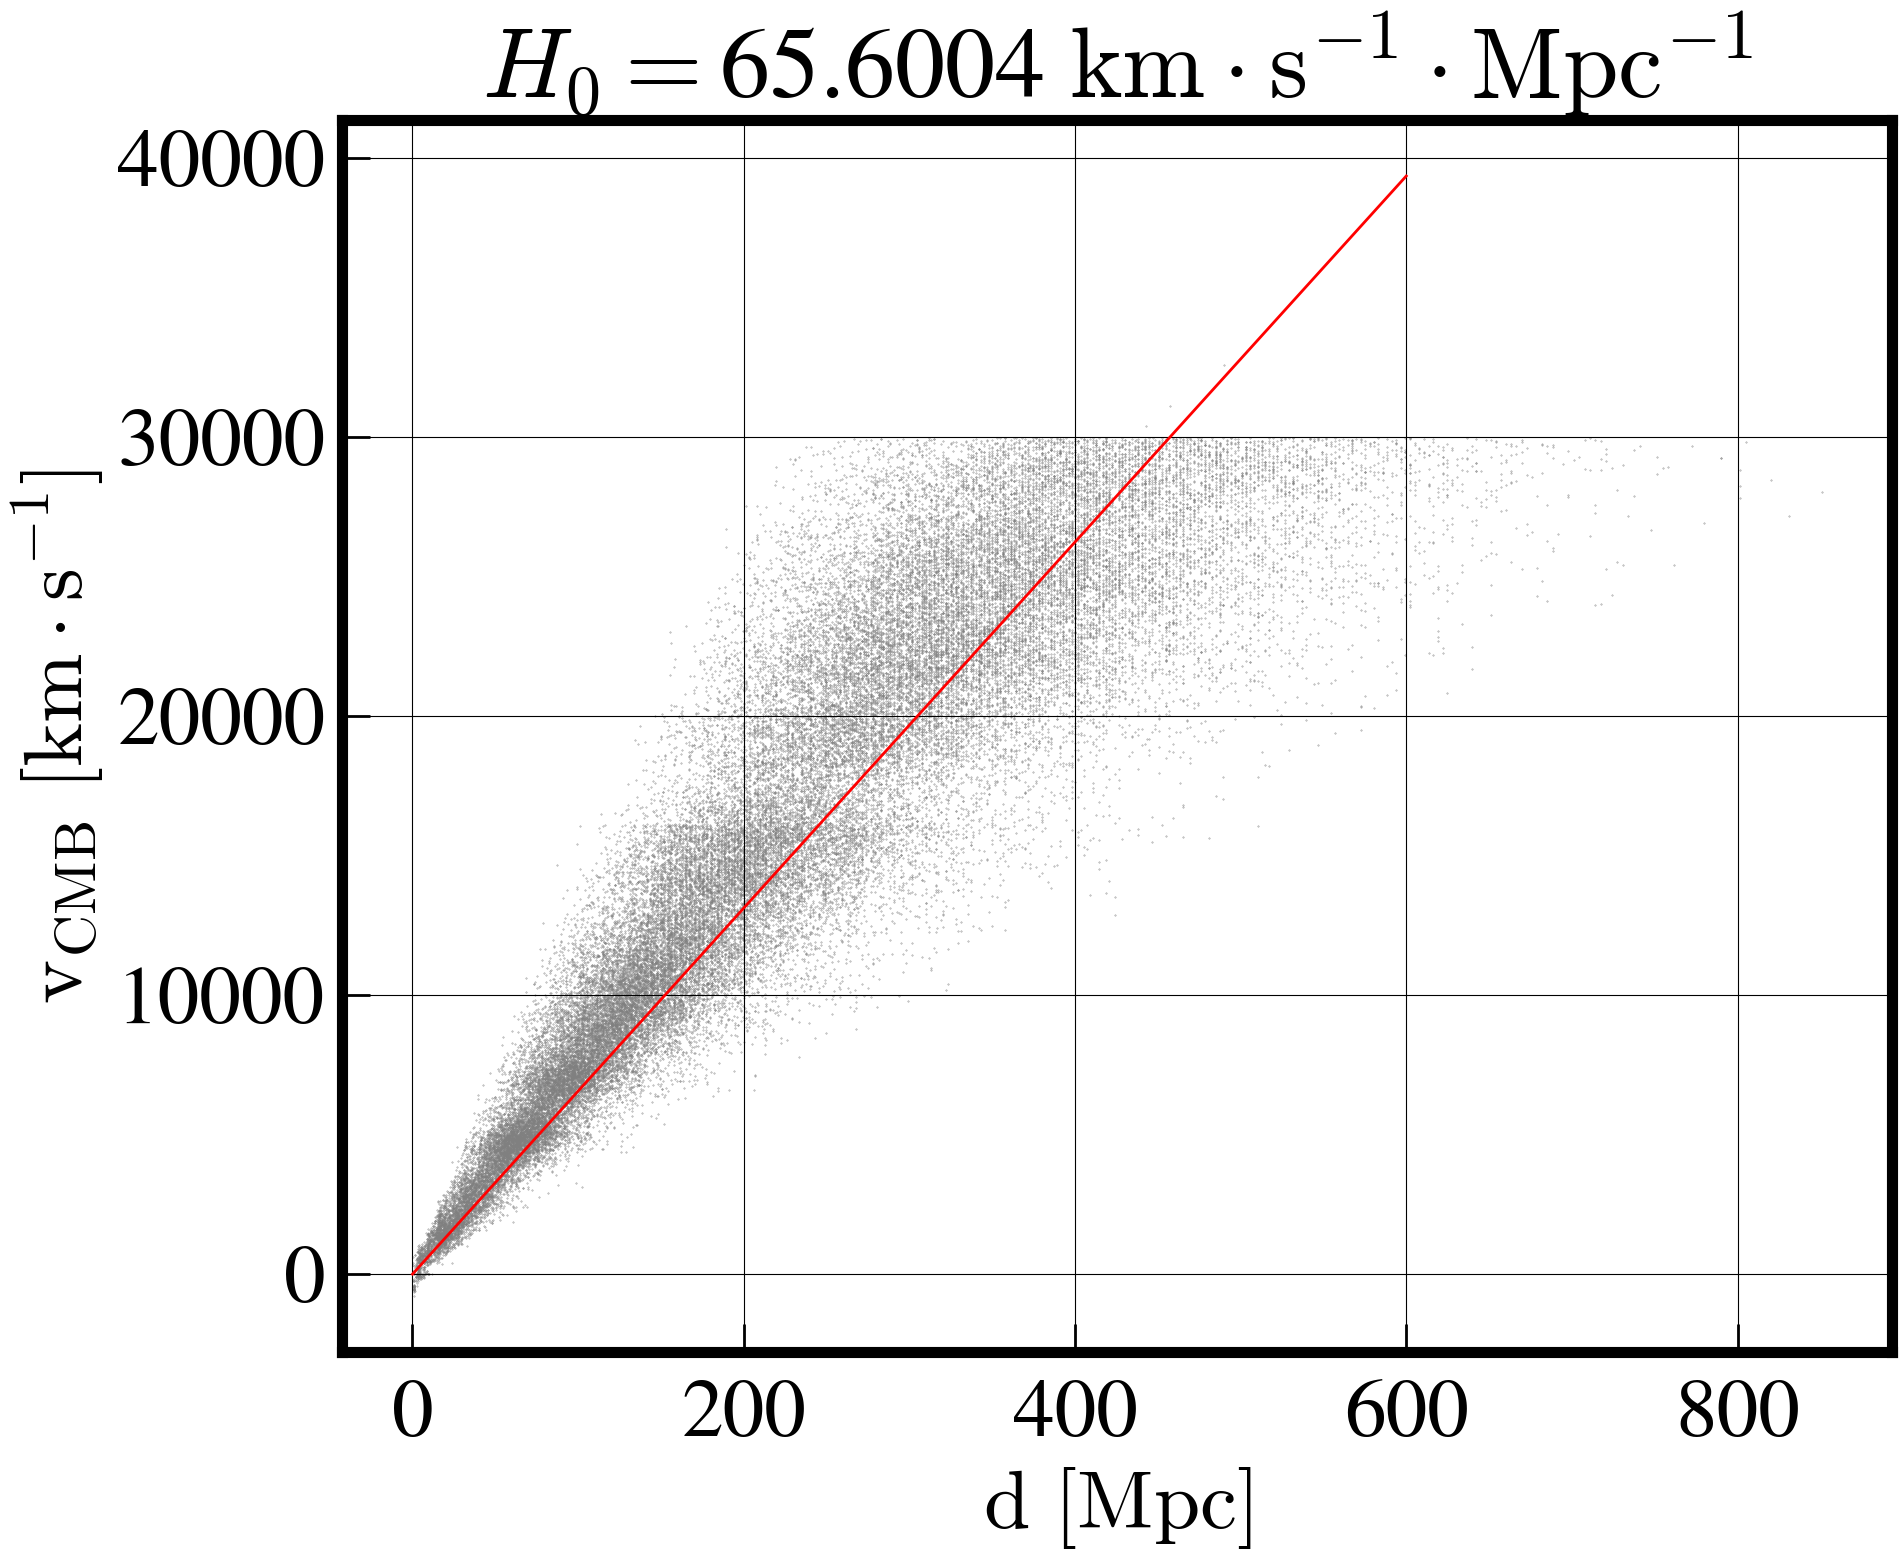

In [33]:
fig = plt.figure(figsize=(20, 16))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(dist_mod(cf4_table2['DM']) / 1e+6, cf4_table2['Vcmb'], s=0.1, color='gray')
ax.errorbar(dist_mod(cf4_table2['DM']) / 1e+6, cf4_table2['Vcmb'],
             xerr=dist_mod(cf4_table2['eDM']) / 1e+6, linestyle='none', color='gray')

popt, pcov = curve_fit(linear, dist_mod(cf4_table2['DM']) / 1e+6, cf4_table2['Vcmb'])

X = np.linspace(0, 600, 100)

ax.plot(X, popt[0] * X, c='red')

cosmic_popt = popt[0]
ax.set_title(f'$H_0=${round(cosmic_popt, 4)} $\mathrm{{km\cdot s^{{-1}}\cdot Mpc^{{-1}}}}$')
ax.set_xlabel('$\mathrm{d\ [Mpc]}$')
ax.set_ylabel('$\mathrm{v_{CMB}\ [km\cdot s^{-1}]}$')

Text(0, 0.5, '$\\mathrm{v_{CMB}\\ [km\\cdot s^{-1}]}$')

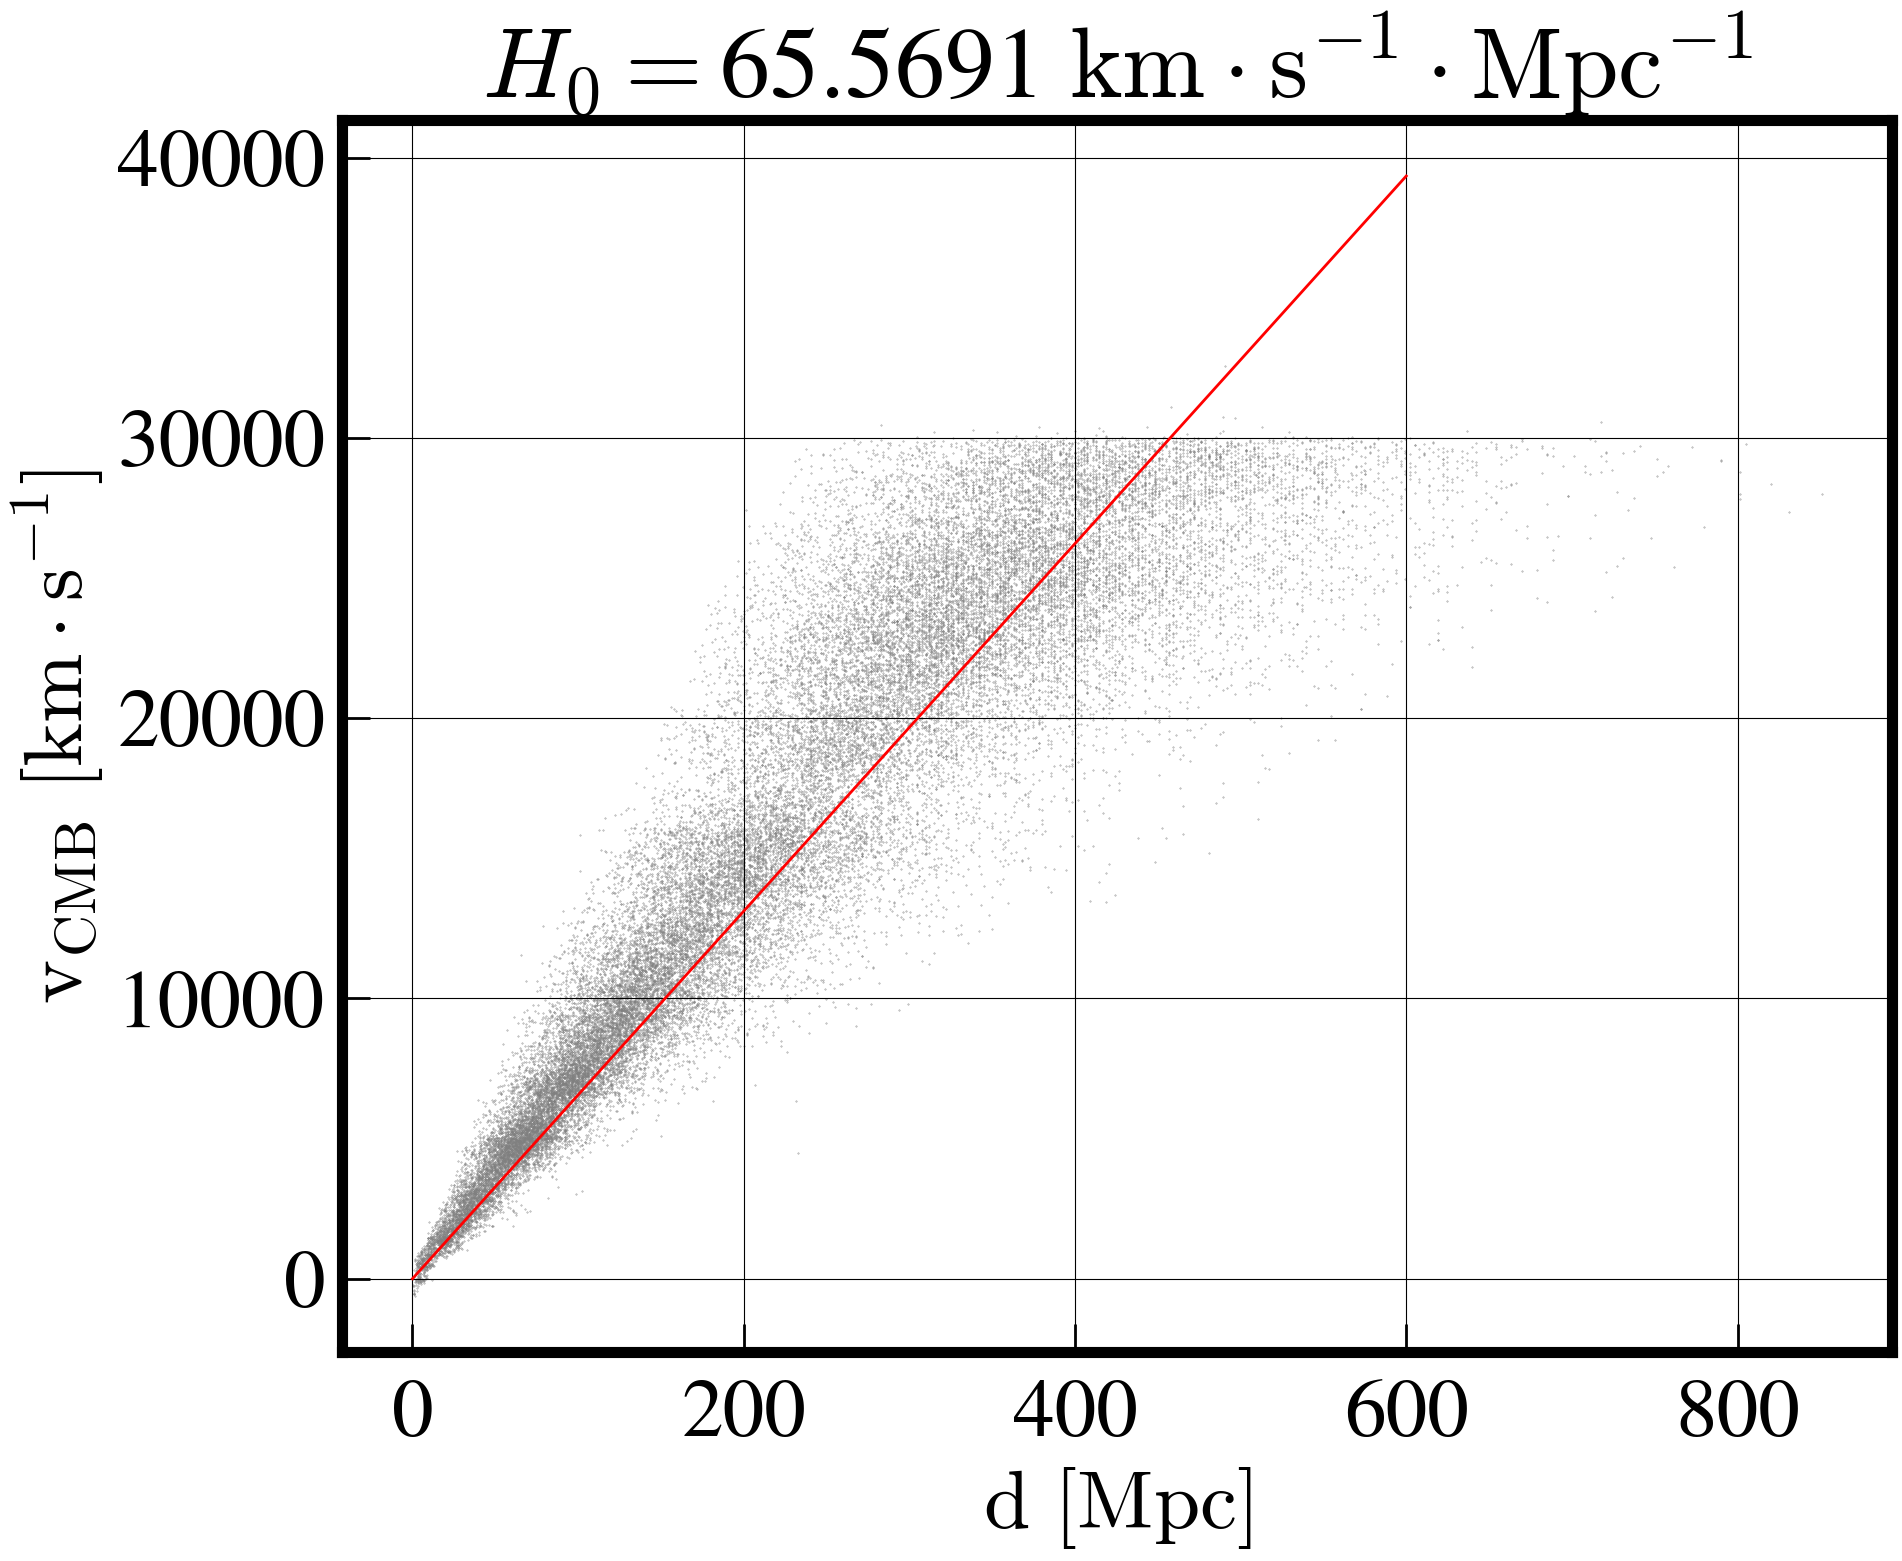

In [34]:
fig = plt.figure(figsize=(20, 16))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(dist_mod(cf4_table3['DM_zp']) / 1e+6, cf4_table3['Vcmb'], s=0.1, color='gray')
ax.errorbar(dist_mod(cf4_table3['DM_zp']) / 1e+6, cf4_table3['Vcmb'],
             xerr=dist_mod(cf4_table3['eDM_av']) / 1e+6, linestyle='none', color='gray')

popt, pcov = curve_fit(linear, dist_mod(cf4_table3['DM_zp']) / 1e+6, cf4_table3['Vcmb'])

X = np.linspace(0, 600, 100)

ax.plot(X, popt[0] * X, c='red')

cosmic_popt = popt[0]
ax.set_title(f'$H_0=${round(cosmic_popt, 4)} $\mathrm{{km\cdot s^{{-1}}\cdot Mpc^{{-1}}}}$')
ax.set_xlabel('$\mathrm{d\ [Mpc]}$')
ax.set_ylabel('$\mathrm{v_{CMB}\ [km\cdot s^{-1}]}$')

Text(0, 0.5, '$\\mathrm{v_{CMB}\\ [km\\cdot s^{-1}]}$')

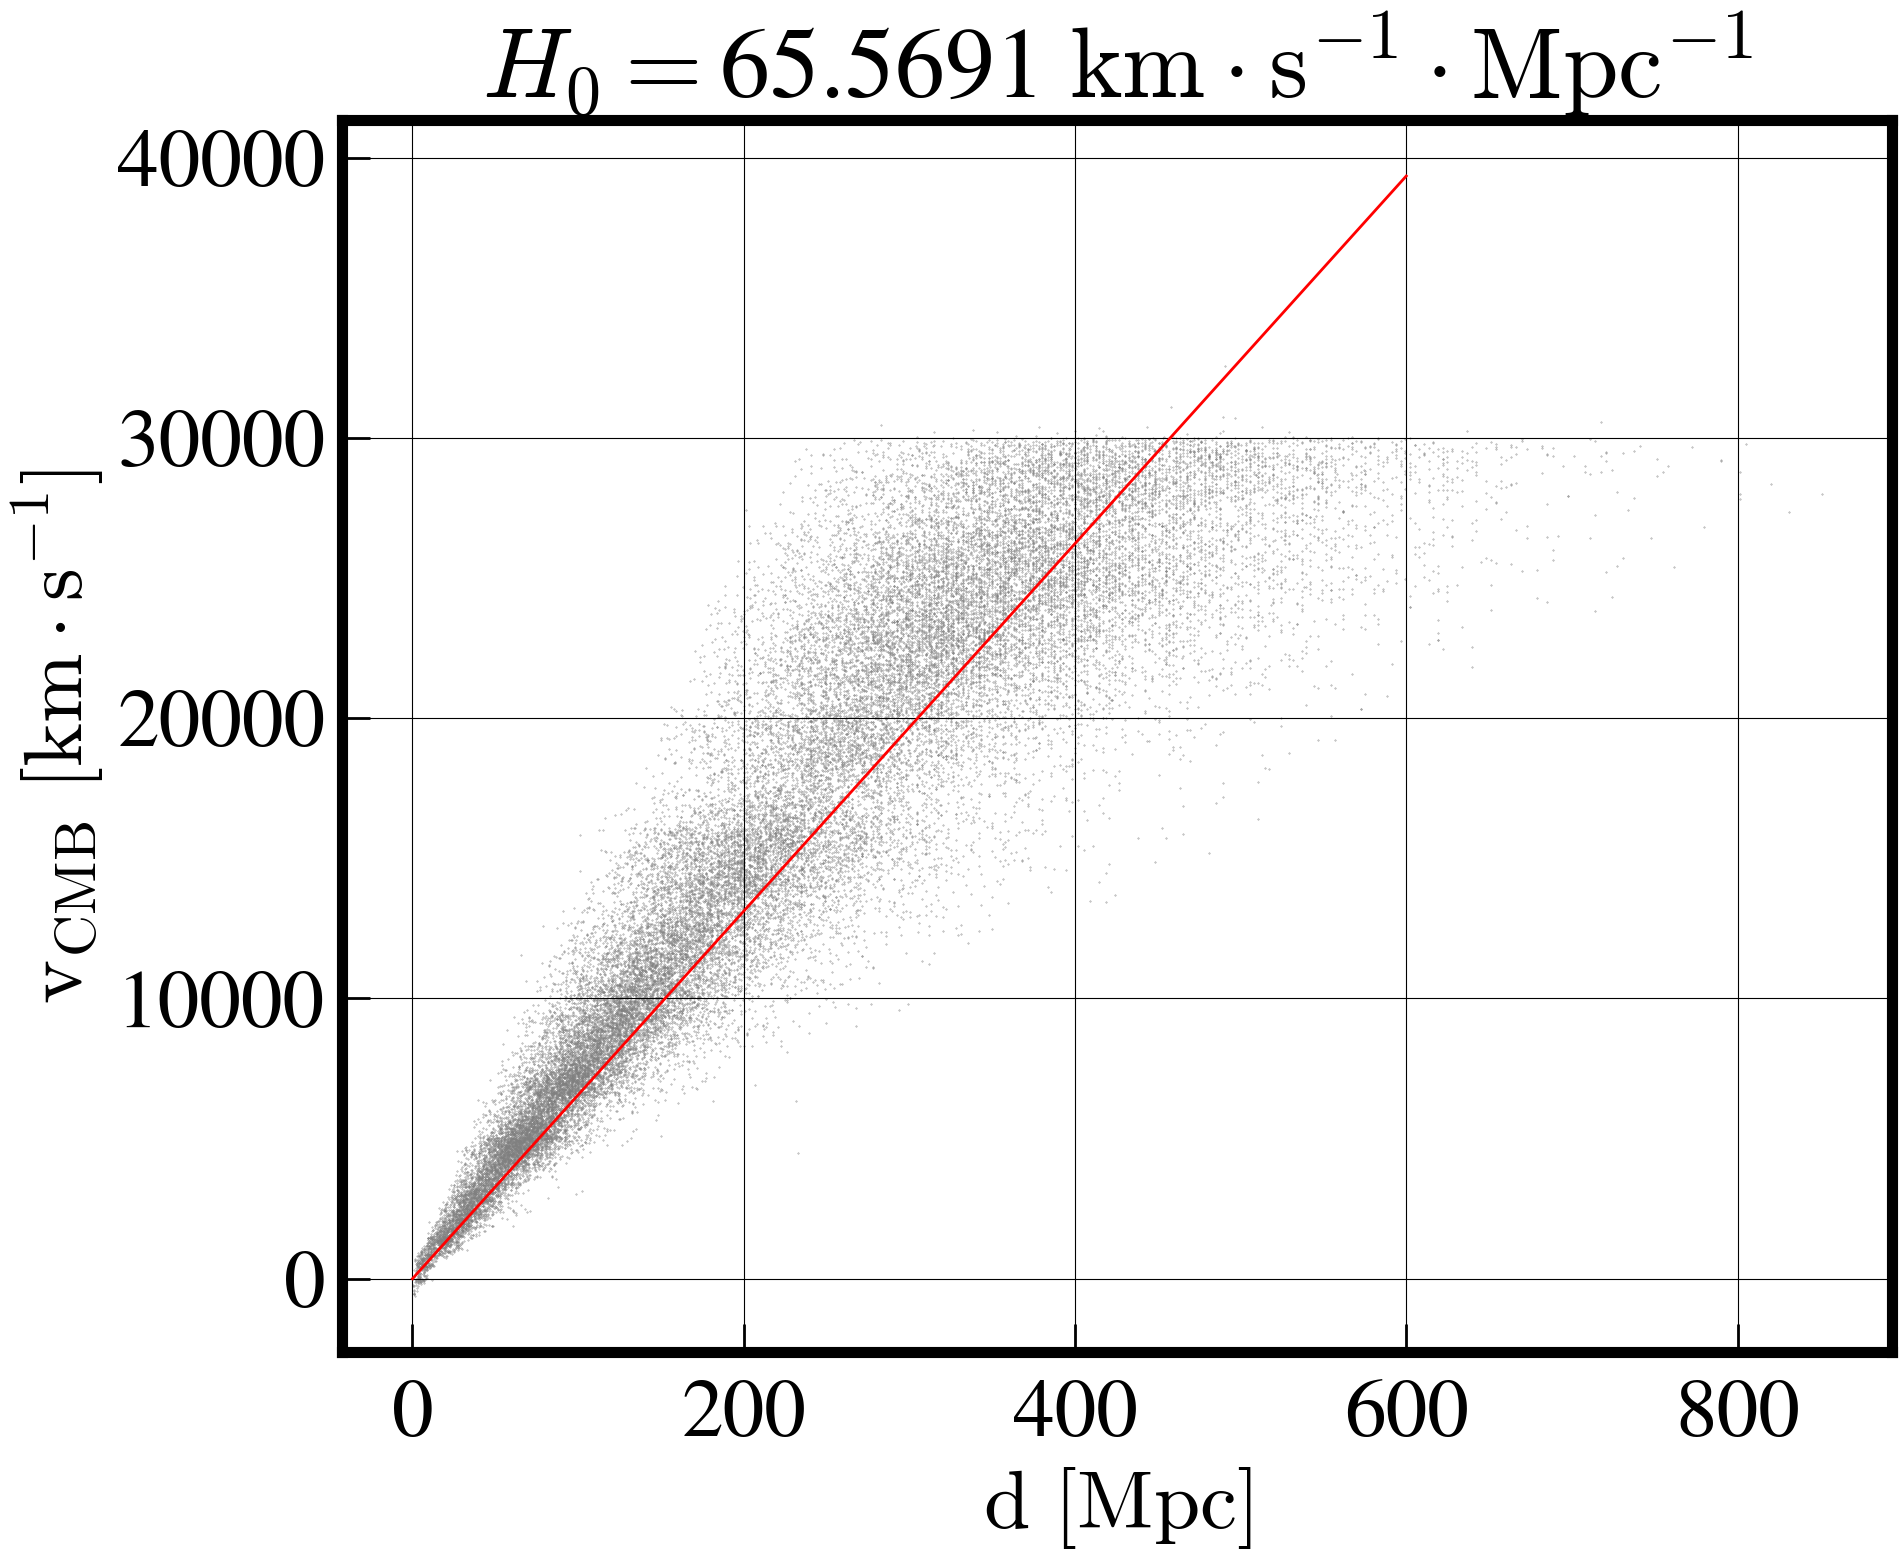

In [36]:
fig = plt.figure(figsize=(20, 16))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(dist_mod(cf4_table4['DMzp']) / 1e+6, cf4_table4['Vcmb'], s=0.1, color='gray')
ax.errorbar(dist_mod(cf4_table4['DMzp']) / 1e+6, cf4_table4['Vcmb'],
             xerr=dist_mod(cf4_table4['eDM']) / 1e+6, linestyle='none', color='gray')

popt, pcov = curve_fit(linear, dist_mod(cf4_table4['DMzp']) / 1e+6, cf4_table4['Vcmb'])

X = np.linspace(0, 600, 100)

ax.plot(X, popt[0] * X, c='red')

cosmic_popt = popt[0]
ax.set_title(f'$H_0=${round(cosmic_popt, 4)} $\mathrm{{km\cdot s^{{-1}}\cdot Mpc^{{-1}}}}$')
ax.set_xlabel('$\mathrm{d\ [Mpc]}$')
ax.set_ylabel('$\mathrm{v_{CMB}\ [km\cdot s^{-1}]}$')

Text(0, 0.5, '$\\mathrm{fv_{CMB}\\ [km\\cdot s^{-1}]}$')

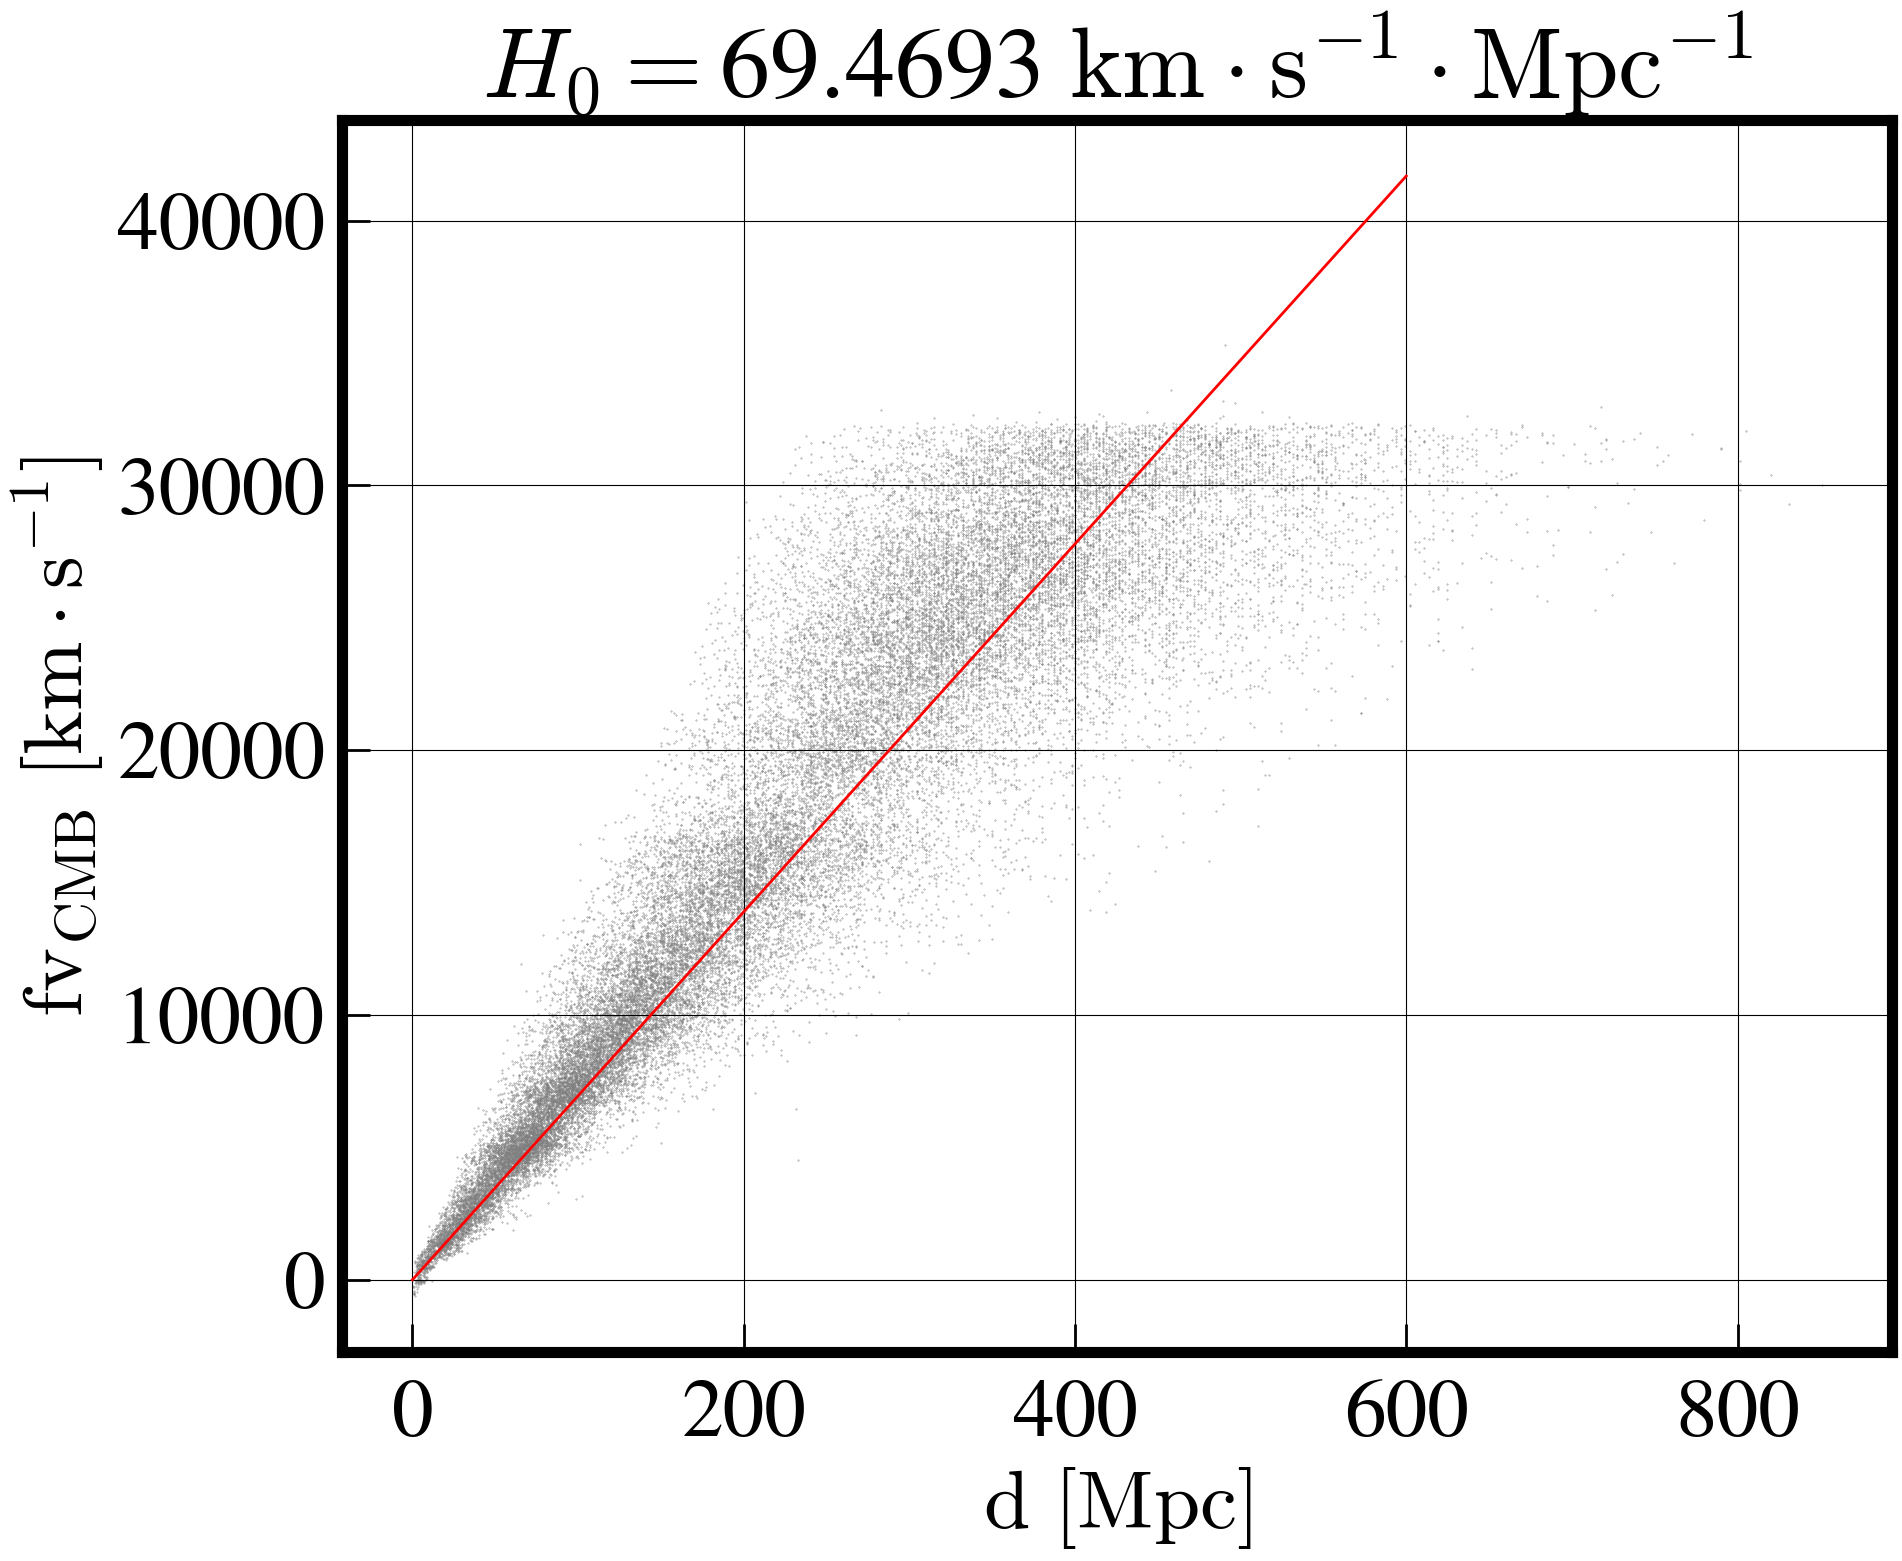

In [38]:
fig = plt.figure(figsize=(20, 16))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(dist_mod(cf4_table4['DMzp']) / 1e+6, cf4_table4['fV'], s=0.1, color='gray')
ax.errorbar(dist_mod(cf4_table4['DMzp']) / 1e+6, cf4_table4['fV'],
             xerr=dist_mod(cf4_table4['eDM']) / 1e+6, linestyle='none', color='gray')

popt, pcov = curve_fit(linear, dist_mod(cf4_table4['DMzp']) / 1e+6, cf4_table4['fV'])

X = np.linspace(0, 600, 100)

ax.plot(X, popt[0] * X, c='red')

cosmic_popt = popt[0]
ax.set_title(f'$H_0=${round(cosmic_popt, 4)} $\mathrm{{km\cdot s^{{-1}}\cdot Mpc^{{-1}}}}$')
ax.set_xlabel('$\mathrm{d\ [Mpc]}$')
ax.set_ylabel('$\mathrm{f\ v_{CMB}\ [km\cdot s^{-1}]}$')

Text(0, 0.5, '$\\mathrm{v_{CMB}\\ [km\\cdot s^{-1}]}$')

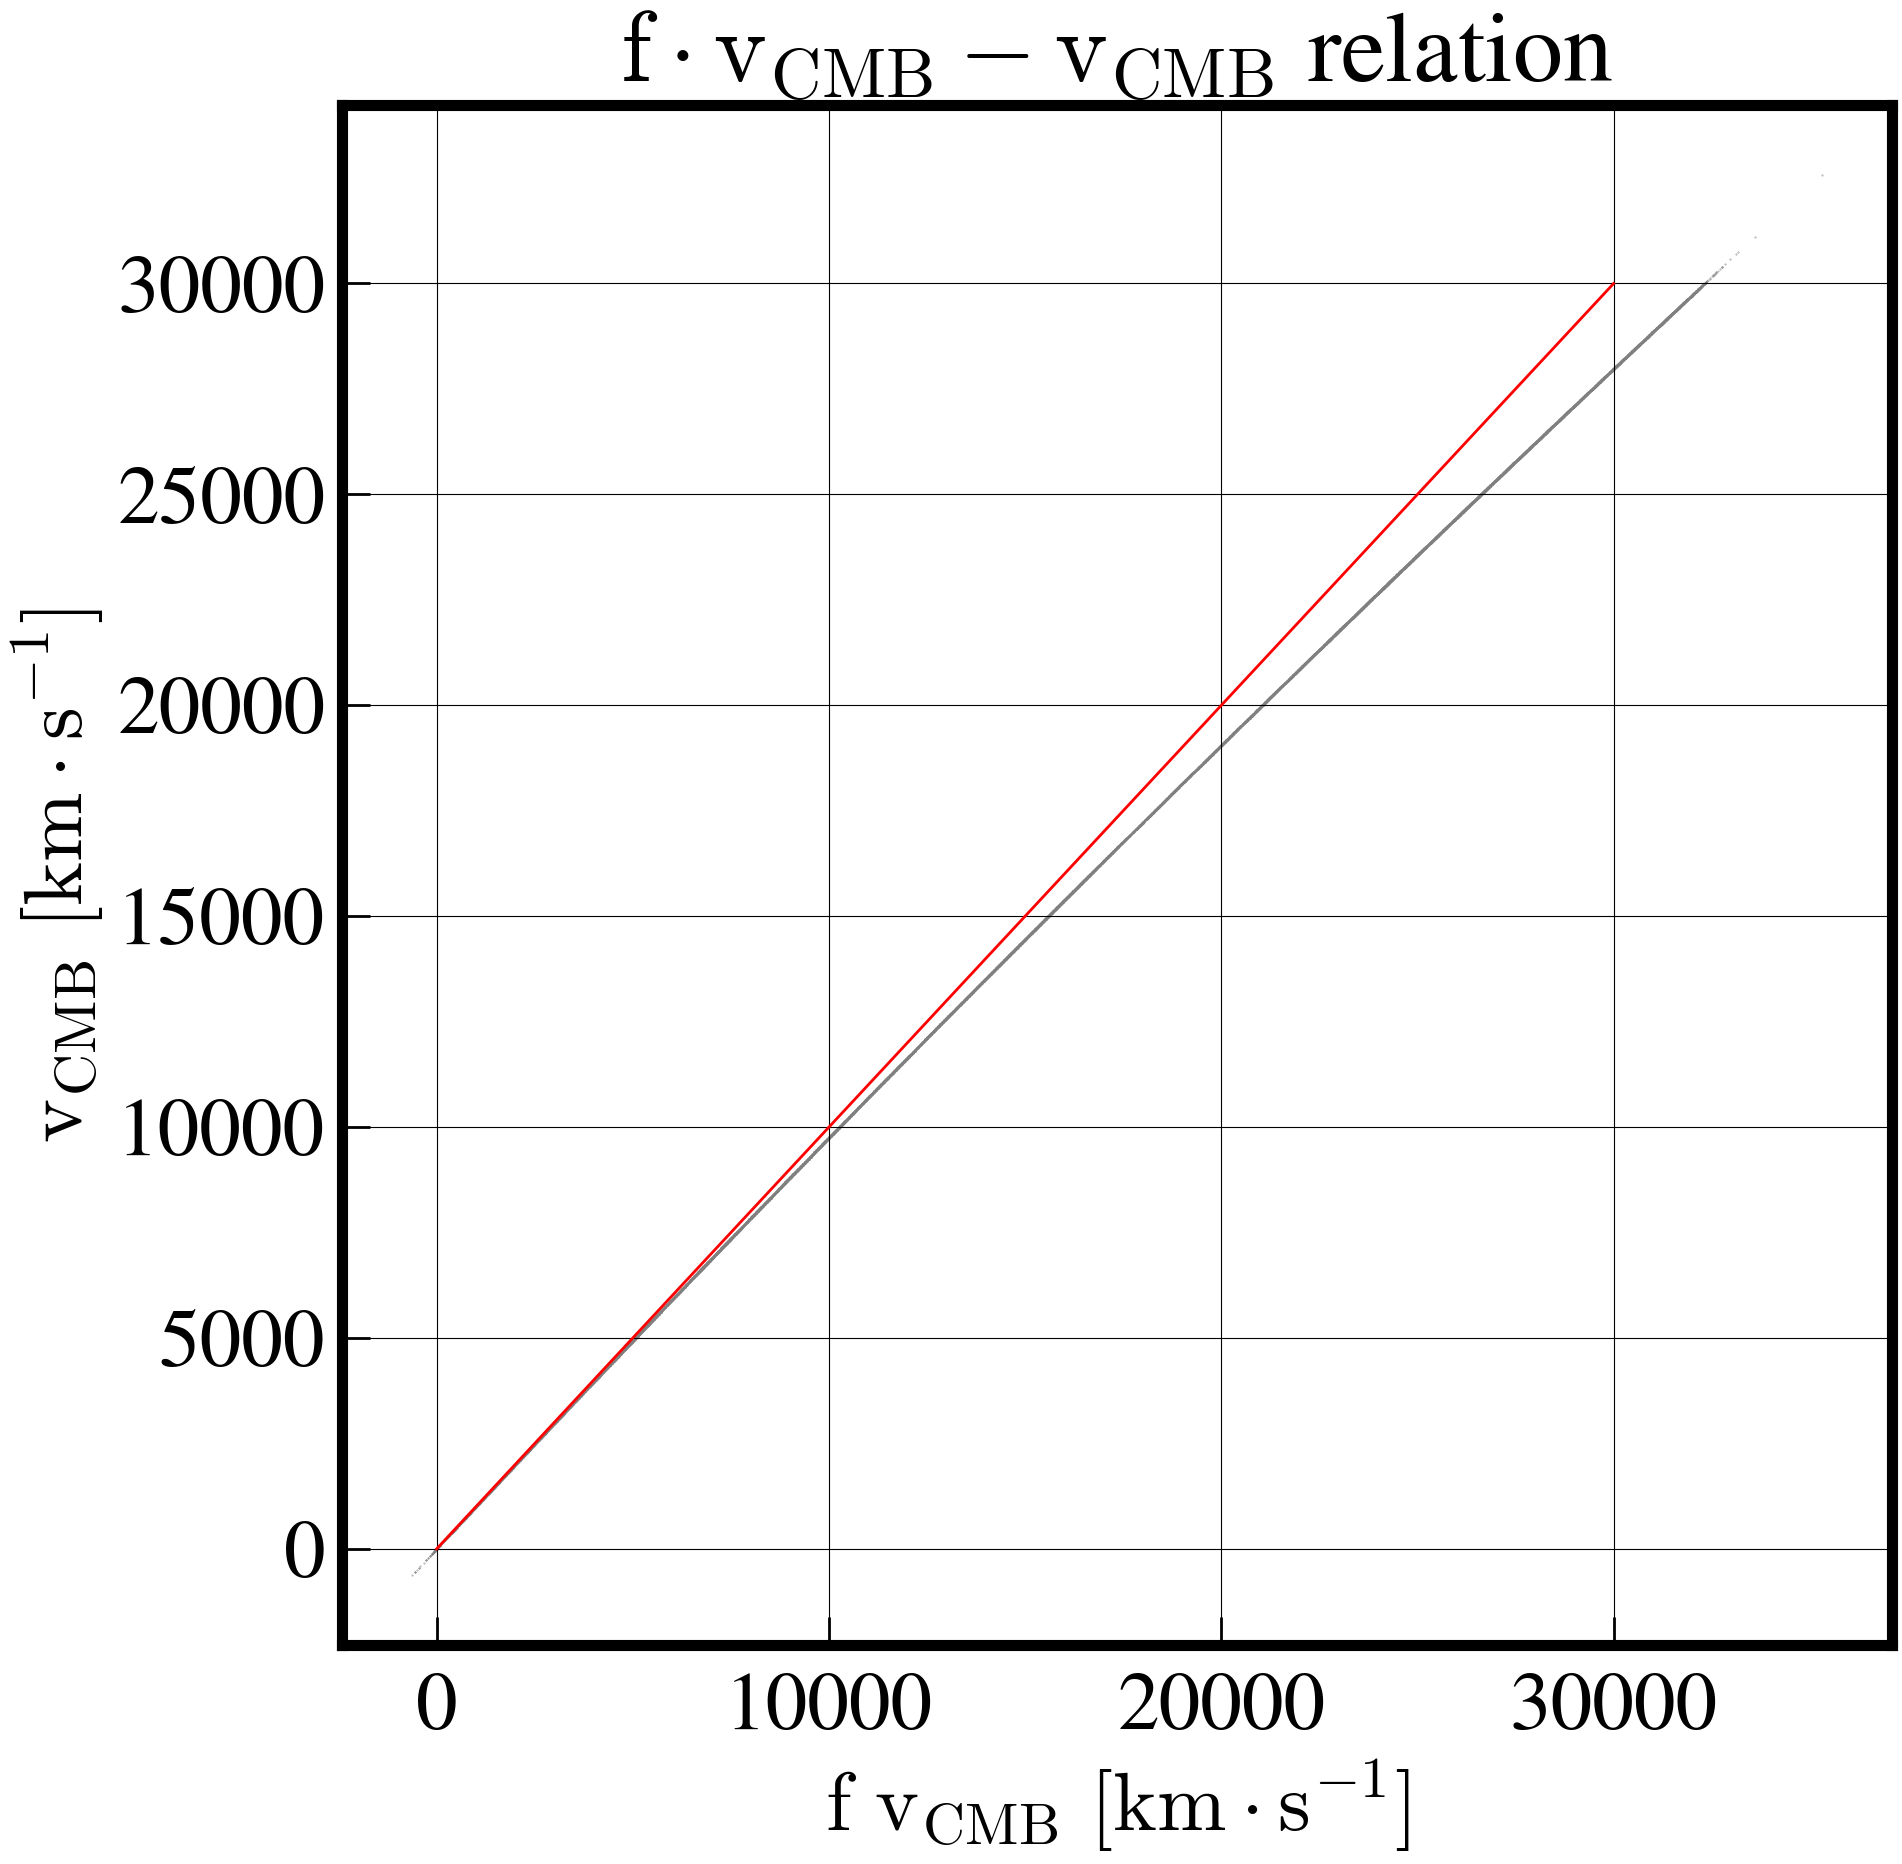

In [45]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(cf4_table4['fV'], cf4_table4['Vcmb'], s=0.1, color='gray')
X = np.linspace(0, 3e+4, 100)
ax.plot(X, X, c='red')

ax.set_title('$\mathrm{f\cdot v_{CMB} - v_{CMB}}$ relation')
ax.set_xlabel('$\mathrm{f\ v_{CMB}\ [km\cdot s^{-1}]}$')
ax.set_ylabel('$\mathrm{v_{CMB}\ [km\cdot s^{-1}]}$')

## Homework
1. 지난 'spectroscopy' 강의 시간에 구한 각 은하의 redshift와 이번 시간에 제공된 dist.txt 파일의 거리를 매칭하여 Hubble 상수를 구해보자
2. z_sdss.txt 파일을 통해 cone-diagram을 그려보자.
3. Cosmicflows-4의 v_cmb와 DM을 통해 Hubble 상수를 구해보자
4. 상기한 내용들을 포함하여 보고서를 작성하자.

[주의!] 하술할 DISCUSSION에 대한 각자의 고찰을 보고서에 작성해주시기 바랍니다. DISCUSSION의 모든 내용을 포함할 필요는 없으나, 본 과제의 주요 채점 요소가 될 것입니다. 

## DISCUSSION
1. 학계에서 Distance ladder를 통해 Hubble 상수를 추정하면 대략 72km/s/Mpc 언저리가 나온다. (Cosmicflows-4의 경우는 74.6km/s/Mpc)
    - 왜 이 노트북을 통해 구한 Hubble 상수가 distance ladder를 통해 측정한 알려진 값과 다를까?
    - 알려진 값과 맞는 결과를 얻기 위해서는 어떻게 해야 할까?
* DISCUSSION 1이 누락될 경우 보고서에 감점이 부여됩니다.
2. Distance ladder가 잘 작동하고 있을까?
    - Cosmicflows-4는 다양한 methodology들을 이용해 은하까지의 거리를 추산했다. 대개는 같은 은하에 대해 다른 methodology를 사용한 경우도 존재한다. 
    - 특히, 헨리에타 리빗이 발견하고 허블이 사용한 세페이드 변광성의 광도-주기 관계는 TRGB, MASER와 함께 cosmicflows-4의 유용한 calibrator로써 작동하고 있다. 
    - 각자의 방식대로 distance ladder의 calibrator (TRGB, CPLR, MASER)와 main source (TF, FP, SBF, SN Ia)이 잘 맞는지 체크해보자. 
* DISCUSSION 2를 수행한 경우, 가산점이 부여됩니다. 
3. Peculiar velocity에 대해 알아보자.
    - 공간의 팽창말고도, 은하는 중력적 상호작용에 의해 각자의 운동을 한다. 관측자의 시선 방향에서 보이는 이 운동의 속도를 peculiar velocity라고 한다. 
    - cf4_table4.txt에는 vpec이라는 column이 있다. 이는 cosmicflows-4에서 추정한 각 은하군의 peculiar velocity이다. 
    - 각자의 방식대로 peculiar velocity가 hubble constant 계산에 끼칠 수 있는 영향을 분석하고 고찰해보자. 
* DISCUSSION 3을 수행한 경우, 가산점이 부여됩니다.